<a href="https://colab.research.google.com/github/disinikk/PoliticsPLA/blob/main/Tweet%20crawl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nest_asyncio
!pip3 uninstall twint
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install git+https://github.com/woluxwolu/twint.git
!pip install tweepy

#!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0

#Restart after run

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: twint 2.1.21
Uninstalling twint-2.1.21:
  Would remove:
    /usr/local/bin/twint
    /usr/local/lib/python3.8/dist-packages/twint-2.1.21.dist-info/*
    /usr/local/lib/python3.8/dist-packages/twint/*
Proceed (y/n)? y
  Successfully uninstalled twint-2.1.21
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/woluxwolu/twint.git to /tmp/pip-req-build-i28bkvol
  Running command git clone -q https://github.com/woluxwolu/twint.git /tmp/pip-req-build-i28bkvol
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=40475 sha256=3a0509a2bc0151479a918d97f951e76c7b5246efe1352ab19071b367a9257bc5
  Stored in directory: /tmp/pip-ephem-wheel-cache-clkuozgr/wheels/82/3f/40/e6899fe68e35cb6befd84cb8a07fe05cf774e4099c6b7087b2
Successfully built twint


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=a74e69e83a209379cb77aeb40df6b80cf88ecb715e95e6e1da406fd38ed352f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-e19syy56/wheels/a9/70/09/93062f64eee119ab310a33bae425d98678f627d1dc1b667e8f
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    

In [ ]:
import twint
import nest_asyncio
import pandas as pd
pd.options.mode.chained_assignment = None
import json
import tweepy
from datetime import datetime
import time
import numpy as np
import base64
import requests
from tqdm import tqdm
import glob
import os

nest_asyncio.apply()

In [ ]:
list_key =["kadrun OR drun",
        "cebong OR bong",
        "kadal gurun"
        ]

In [ ]:
for j in list_key :
    #print(i)
    print(j)
    c = twint.Config()
    c.Search = j
    c.Lang = 'id'
    # c.Location = True
    c.Since = '2018-01-01'
    c.Until = '2022-11-30'
    c.Count = True
    c.Retweets = True
    c.Stats = True
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_csv = True
    # c.Links = 'include'
    # c.Output = "./ep/"+j+' links.csv'
    c.Links = 'exclude'
    c.Output = "./ep/"+j+'.exclude links.csv'
    #c.Resume = 'resume.txt'
    twint.run.Search(c)


kadrun OR drun
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 60 Tweets.
cebong OR bong
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 20 Tweets.
kadal gurun
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 0 Tweets.


In [ ]:
Listfile = glob.glob("/content/ep/*")
# Listfile
dfs = [pd.read_csv(f) for f in Listfile]
df = pd.concat(dfs, ignore_index=True)

In [ ]:
# Remove data that duplicate
df.drop_duplicates()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1597741193265557504,1597521239458734080,2022-11-29 23:55:59 UTC,2022-11-29,23:55:59,0,1425468247659323401,bundar37047958,bunda r,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN
1,1597733506536599552,1597626276172681218,2022-11-29 23:25:27 UTC,2022-11-29,23:25:27,0,1495047761590636547,bsanto85,Bung_SANTO85,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'gibran_tweet', 'name': 'Gibr...",NaN,NaN,NaN,NaN
2,1597728666913734656,1597051205158477824,2022-11-29 23:06:13 UTC,2022-11-29,23:06:13,0,1499298780579233792,fauzan69899430,fauzan,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BasitoToto', 'name': 'Toto B...",NaN,NaN,NaN,NaN
3,1597714290949361664,1597521239458734080,2022-11-29 22:09:05 UTC,2022-11-29,22:09:05,0,1335773500766703616,aslam_racing_t,Tukang Balap 🇮🇩,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN
4,1597702274792685569,1596657687949086720,2022-11-29 21:21:20 UTC,2022-11-29,21:21:20,0,1473934274768216068,somarwanesefnat,Ssomarwane,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sabar_setiabudi', 'name': 's...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,1597735274339270658,1597715430436917250,2022-11-29 23:32:28 UTC,2022-11-29,23:32:28,0,844316731979980800,novi_light,NoviTheProvi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ItzJeshi', 'name': 'Jeshi', ...",NaN,NaN,NaN,NaN
4090,1597735140859387904,1597396338458918912,2022-11-29 23:31:56 UTC,2022-11-29,23:31:56,0,1583572822277771264,johnnybucklin,Johnny Bucklin,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'pgandress', 'name': 'Patrick...",NaN,NaN,NaN,NaN
4091,1597735065450352640,1597735065450352640,2022-11-29 23:31:38 UTC,2022-11-29,23:31:38,0,564225529,hollybrooket,Holly Brooke Taylor,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4096,1597734717499244545,1597734186064175104,2022-11-29 23:30:15 UTC,2022-11-29,23:30:15,0,3954813436,donktoad,DonkeyToad 🐸 🎄❄ (Your Favorite Streamer ),NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'peachefe', 'name': '🍑ℙ𝕖𝕒𝕔𝕙𝕖𝕤...",NaN,NaN,NaN,NaN


In [ ]:
# export to csv for all the combine
df.to_csv("./ep/combine.csv", index=False)

In [ ]:
# remove that are not in indonesian
df_filtered_lang = df[df['language'] == 'in']
df_filtered_lang

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1597741193265557504,1597521239458734080,2022-11-29 23:55:59 UTC,2022-11-29,23:55:59,0,1425468247659323401,bundar37047958,bunda r,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN
1,1597733506536599552,1597626276172681218,2022-11-29 23:25:27 UTC,2022-11-29,23:25:27,0,1495047761590636547,bsanto85,Bung_SANTO85,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'gibran_tweet', 'name': 'Gibr...",NaN,NaN,NaN,NaN
2,1597728666913734656,1597051205158477824,2022-11-29 23:06:13 UTC,2022-11-29,23:06:13,0,1499298780579233792,fauzan69899430,fauzan,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BasitoToto', 'name': 'Toto B...",NaN,NaN,NaN,NaN
3,1597714290949361664,1597521239458734080,2022-11-29 22:09:05 UTC,2022-11-29,22:09:05,0,1335773500766703616,aslam_racing_t,Tukang Balap 🇮🇩,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN
4,1597702274792685569,1596657687949086720,2022-11-29 21:21:20 UTC,2022-11-29,21:21:20,0,1473934274768216068,somarwanesefnat,Ssomarwane,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sabar_setiabudi', 'name': 's...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,1597741837259018240,1597486045037490177,2022-11-29 23:58:33 UTC,2022-11-29,23:58:33,0,1518446483154292736,wijayati_yayuk,Yayuk Wijayati,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AshhabulYamin4', 'name': 'Mr...",NaN,NaN,NaN,NaN
4686,1597741662880817153,1597019924446449666,2022-11-29 23:57:51 UTC,2022-11-29,23:57:51,0,1530169788580139008,sarul46281635,Sarul,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ki_cakrasurya', 'name': 'Ki ...",NaN,NaN,NaN,NaN
4687,1597741590277038080,1597198941191536640,2022-11-29 23:57:34 UTC,2022-11-29,23:57:34,0,2842734353,dbfireman,dbfireman batiste,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DangoheartAni', 'name': 'Dan...",NaN,NaN,NaN,NaN
4690,1597741494055874560,1597437719331758080,2022-11-29 23:57:11 UTC,2022-11-29,23:57:11,0,826048704536645632,kotkacendrawasi,БЯЧVД 14,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
tweet = df_filtered_lang['tweet']

In [ ]:
#remove username from tweets

import re
pattern = r'(?:&amp;|@[a-zA-Z0-9_]*)'
new =[]
for row in tweet:
    row = re.sub(pattern,"",row)
    new.append(row)
# string = "@alisyarief Merka selalu mengunakan data nik ketika kita berurusan dgn negara,ko bisa kita disuruh jaga sndiri."
# # pattern = r'@[a-zA-Z0-9_]*'
# string = re.sub(pattern,"",string)
# string




In [ ]:
new

['  begitu di skak tentang junjungannya yg suka chat mesum kadal   langsung kicep.dasar mahluk gurun pasir',
 ' Hati-hati, bentar dicopot ama gerombolan Kadal Gurun, karena bisa mengganggu',
 ' Kadla gurun pendukung wan kadal yaman dan imam besar cabul menjerit jerit kejang .... pengasong khilafah perusak NKRI  memang wajib dibasmi',
 ' Oohhh, kadal gurun',
 '   Ganteng ganteng kadal gurun hahaaaa',
 ' KUMPULAN PARA SAKIT HATI, TUKANG FITNAH KEJI, OTAK BUSUK, KADAL GURUN YANG NUMPANG HIDUP DI INDONESIA. TAK PUNYA SEDIKITPUN RASA MALU. MASIH AJA EXIS ENTE.. 🤣',
 ' Raffi Ahmad ikut kumpul dg Relawan langsung diwartakan yg konotasinya  negatif, biar kadal gurun girang ?????.',
 '     Manis kata kadal 🦎 gurun penyesat ideologi dgn membawa penumpang politik identitas.😂😂😂 Ini Indonesia 🇮🇩 bukan temteng 🤪🤪🤪',
 ' Koloni kadal gurun lg pd keluar dr lobang atu atu...😂😂😂...,siapkan infak terbaik untuk konsumsi si jumbo yg mknnya rakus...🤭🤭🤭',
 '     Mana kadal 🦎🦎 gurun paham tex amnesti sdraku 👍'

In [ ]:
df_filtered_lang['tweet_remove'] = new

In [ ]:
df_filtered_lang.to_csv("./ep/filterunameid.csv", index=False)

# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
# import spacy
import string
from nltk.corpus import stopwords
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def remove_unused_char(texts) :
  data = texts.map(lambda x:x.lower())

  data = data.map(lambda x: re.sub(r'[^a-zA-Z0-9 ]', r'', str(x))) # Remove unused character
  data = data.map(lambda x: re.sub('[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', '', str(x))) # Remove punctuation
  data = data.map(lambda x: re.sub('[0123456789]', '', str(x))) #Remove number

  data = data.map(lambda x: x.lstrip())

  data = data.map(lambda x: re.sub(r'@\S+', '', x)) # Remove mention
  data = data.map(lambda x: re.sub(r'#\S+', '', x)) # Remove hashtag
  data = data.map(lambda x: re.sub(r'https\S+', '', x)) # Remove URL

  return data

In [ ]:
unclean_data = df_filtered_lang
tweets = unclean_data[['tweet_remove']]
tweets
preprocessed = remove_unused_char(tweets.tweet_remove)
unclean_data['tweet_preprocessed'] = preprocessed

In [ ]:
unclean_data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_remove,tweet_preprocessed
0,1597741193265557504,1597521239458734080,2022-11-29 23:55:59 UTC,2022-11-29,23:55:59,0,1425468247659323401,bundar37047958,bunda r,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN,begitu di skak tentang junjungannya yg suka ...,begitu di skak tentang junjungannya yg suka ch...
1,1597733506536599552,1597626276172681218,2022-11-29 23:25:27 UTC,2022-11-29,23:25:27,0,1495047761590636547,bsanto85,Bung_SANTO85,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'gibran_tweet', 'name': 'Gibr...",NaN,NaN,NaN,NaN,"Hati-hati, bentar dicopot ama gerombolan Kada...",hatihati bentar dicopot ama gerombolan kadal g...
2,1597728666913734656,1597051205158477824,2022-11-29 23:06:13 UTC,2022-11-29,23:06:13,0,1499298780579233792,fauzan69899430,fauzan,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'BasitoToto', 'name': 'Toto B...",NaN,NaN,NaN,NaN,Kadla gurun pendukung wan kadal yaman dan ima...,kadla gurun pendukung wan kadal yaman dan imam...
3,1597714290949361664,1597521239458734080,2022-11-29 22:09:05 UTC,2022-11-29,22:09:05,0,1335773500766703616,aslam_racing_t,Tukang Balap 🇮🇩,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN,"Oohhh, kadal gurun",oohhh kadal gurun
4,1597702274792685569,1596657687949086720,2022-11-29 21:21:20 UTC,2022-11-29,21:21:20,0,1473934274768216068,somarwanesefnat,Ssomarwane,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'sabar_setiabudi', 'name': 's...",NaN,NaN,NaN,NaN,Ganteng ganteng kadal gurun hahaaaa,ganteng ganteng kadal gurun hahaaaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,1597741837259018240,1597486045037490177,2022-11-29 23:58:33 UTC,2022-11-29,23:58:33,0,1518446483154292736,wijayati_yayuk,Yayuk Wijayati,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'AshhabulYamin4', 'name': 'Mr...",NaN,NaN,NaN,NaN,Bisa saja...dia golongan kadrunista undercov...,bisa sajadia golongan kadrunista undercover ja...
4686,1597741662880817153,1597019924446449666,2022-11-29 23:57:51 UTC,2022-11-29,23:57:51,0,1530169788580139008,sarul46281635,Sarul,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'ki_cakrasurya', 'name': 'Ki ...",NaN,NaN,NaN,NaN,Rupanya Rafi keluarga cebong?,rupanya rafi keluarga cebong
4687,1597741590277038080,1597198941191536640,2022-11-29 23:57:34 UTC,2022-11-29,23:57:34,0,2842734353,dbfireman,dbfireman batiste,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'DangoheartAni', 'name': 'Dan...",NaN,NaN,NaN,NaN,Bing bong,bing bong
4690,1597741494055874560,1597437719331758080,2022-11-29 23:57:11 UTC,2022-11-29,23:57:11,0,826048704536645632,kotkacendrawasi,БЯЧVД 14,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Namanya musibah otomatis bantuan datang tanpa...,namanya musibah otomatis bantuan datang tanpa ...


In [ ]:
slang = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha",
         "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku",
         "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar",
         "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku",
         "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu",
         "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
         "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget",
         "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda",
         "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar",
         "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang",
         "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan",
         "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci",
         "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong",
         "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",
         "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong",
         "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat",
         "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum",
         "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut",
         "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja",
         "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep",
         "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi",
         "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek",
         "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor",
         "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat",
         "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan",
         "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan",
         "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong",
         "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang",
         "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu",
         "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan",
         "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi",
         "ga" : "tidak", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang","blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin","az":"astrazeneca", "mdrn":"moderna","pfz":"pfizer","bhw":"bahwa", "btl":"betul","pinjol":"pinjaman online", "drun":"kadrun", "bong":"cebong"}


In [ ]:
unclean_data['tweet_preprocessed'] = unclean_data['tweet_preprocessed'].astype(str).apply(lambda x: ' '.join(slang.get(word, word) for word in x.split()))
clean_data_slang = unclean_data
# clean_data_slang = clean_data_slang.dropna()
clean_data_slang

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_remove,tweet_preprocessed
0,1597741193265557504,1597521239458734080,2022-11-29 23:55:59 UTC,2022-11-29,23:55:59,0,1425468247659323401,bundar37047958,bunda r,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN,begitu di skak tentang junjungannya yg suka ...,begitu di skak tentang junjungannya yang suka ...
1,1597733506536599552,1597626276172681218,2022-11-29 23:25:27 UTC,2022-11-29,23:25:27,0,1495047761590636547,bsanto85,Bung_SANTO85,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'gibran_tweet', 'name': 'Gibr...",NaN,NaN,NaN,NaN,"Hati-hati, bentar dicopot ama gerombolan Kada...",hatihati sebentar dicopot sama gerombolan kada...
2,1597728666913734656,1597051205158477824,2022-11-29 23:06:13 UTC,2022-11-29,23:06:13,0,1499298780579233792,fauzan69899430,fauzan,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'BasitoToto', 'name': 'Toto B...",NaN,NaN,NaN,NaN,Kadla gurun pendukung wan kadal yaman dan ima...,kadla gurun pendukung wan kadal yaman dan imam...
3,1597714290949361664,1597521239458734080,2022-11-29 22:09:05 UTC,2022-11-29,22:09:05,0,1335773500766703616,aslam_racing_t,Tukang Balap 🇮🇩,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN,"Oohhh, kadal gurun",oohhh kadal gurun
4,1597702274792685569,1596657687949086720,2022-11-29 21:21:20 UTC,2022-11-29,21:21:20,0,1473934274768216068,somarwanesefnat,Ssomarwane,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'sabar_setiabudi', 'name': 's...",NaN,NaN,NaN,NaN,Ganteng ganteng kadal gurun hahaaaa,ganteng ganteng kadal gurun hahaaaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,1597741837259018240,1597486045037490177,2022-11-29 23:58:33 UTC,2022-11-29,23:58:33,0,1518446483154292736,wijayati_yayuk,Yayuk Wijayati,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'AshhabulYamin4', 'name': 'Mr...",NaN,NaN,NaN,NaN,Bisa saja...dia golongan kadrunista undercov...,bisa sajadia golongan kadrunista undercover ja...
4686,1597741662880817153,1597019924446449666,2022-11-29 23:57:51 UTC,2022-11-29,23:57:51,0,1530169788580139008,sarul46281635,Sarul,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'ki_cakrasurya', 'name': 'Ki ...",NaN,NaN,NaN,NaN,Rupanya Rafi keluarga cebong?,rupanya rafi keluarga cebong
4687,1597741590277038080,1597198941191536640,2022-11-29 23:57:34 UTC,2022-11-29,23:57:34,0,2842734353,dbfireman,dbfireman batiste,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'DangoheartAni', 'name': 'Dan...",NaN,NaN,NaN,NaN,Bing bong,bing cebong
4690,1597741494055874560,1597437719331758080,2022-11-29 23:57:11 UTC,2022-11-29,23:57:11,0,826048704536645632,kotkacendrawasi,БЯЧVД 14,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Namanya musibah otomatis bantuan datang tanpa...,namanya musibah otomatis bantuan datang tanpa ...


In [ ]:
data=[]
i = 1
for tweet in clean_data_slang['tweet_preprocessed']:
    katadasar = str(tweet)
    stop = stopword.remove(katadasar)
    hasil=(" ".join(stop.split()))
    data.append([hasil])


In [ ]:
data = pd.DataFrame(data,columns=['tweet_processing'])
clean_data = clean_data_slang.reset_index().drop(['index'], axis=1)
data
clean_data['tweet_preprocessed'] = data['tweet_processing']
clean_data


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_remove,tweet_preprocessed
0,1597741193265557504,1597521239458734080,2022-11-29 23:55:59 UTC,2022-11-29,23:55:59,0,1425468247659323401,bundar37047958,bunda r,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN,begitu di skak tentang junjungannya yg suka ...,di skak junjungannya suka chat mesum kadal lan...
1,1597733506536599552,1597626276172681218,2022-11-29 23:25:27 UTC,2022-11-29,23:25:27,0,1495047761590636547,bsanto85,Bung_SANTO85,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'gibran_tweet', 'name': 'Gibr...",NaN,NaN,NaN,NaN,"Hati-hati, bentar dicopot ama gerombolan Kada...",hatihati sebentar dicopot sama gerombolan kada...
2,1597728666913734656,1597051205158477824,2022-11-29 23:06:13 UTC,2022-11-29,23:06:13,0,1499298780579233792,fauzan69899430,fauzan,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'BasitoToto', 'name': 'Toto B...",NaN,NaN,NaN,NaN,Kadla gurun pendukung wan kadal yaman dan ima...,kadla gurun pendukung wan kadal yaman imam bes...
3,1597714290949361664,1597521239458734080,2022-11-29 22:09:05 UTC,2022-11-29,22:09:05,0,1335773500766703616,aslam_racing_t,Tukang Balap 🇮🇩,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'firzahusainInc', 'name': 'Fi...",NaN,NaN,NaN,NaN,"Oohhh, kadal gurun",oohhh kadal gurun
4,1597702274792685569,1596657687949086720,2022-11-29 21:21:20 UTC,2022-11-29,21:21:20,0,1473934274768216068,somarwanesefnat,Ssomarwane,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'sabar_setiabudi', 'name': 's...",NaN,NaN,NaN,NaN,Ganteng ganteng kadal gurun hahaaaa,ganteng ganteng kadal gurun hahaaaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,1597741837259018240,1597486045037490177,2022-11-29 23:58:33 UTC,2022-11-29,23:58:33,0,1518446483154292736,wijayati_yayuk,Yayuk Wijayati,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'AshhabulYamin4', 'name': 'Mr...",NaN,NaN,NaN,NaN,Bisa saja...dia golongan kadrunista undercov...,sajadia golongan kadrunista undercover jadi ce...
3757,1597741662880817153,1597019924446449666,2022-11-29 23:57:51 UTC,2022-11-29,23:57:51,0,1530169788580139008,sarul46281635,Sarul,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'ki_cakrasurya', 'name': 'Ki ...",NaN,NaN,NaN,NaN,Rupanya Rafi keluarga cebong?,rupanya rafi keluarga cebong
3758,1597741590277038080,1597198941191536640,2022-11-29 23:57:34 UTC,2022-11-29,23:57:34,0,2842734353,dbfireman,dbfireman batiste,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'DangoheartAni', 'name': 'Dan...",NaN,NaN,NaN,NaN,Bing bong,bing cebong
3759,1597741494055874560,1597437719331758080,2022-11-29 23:57:11 UTC,2022-11-29,23:57:11,0,826048704536645632,kotkacendrawasi,БЯЧVД 14,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Namanya musibah otomatis bantuan datang tanpa...,namanya musibah otomatis bantuan datang mengen...


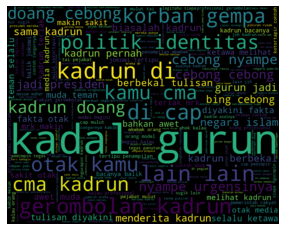

In [ ]:
# Plot The Word Cloud
import os
os.path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in clean_data['tweet_preprocessed']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Get only relevant column (original tweet, links, preprocessed)
clean_data.dtypes

id                      int64
conversation_id         int64
created_at             object
date                   object
time                   object
timezone                int64
user_id                 int64
username               object
name                   object
place                 float64
tweet                  object
language               object
mentions               object
urls                   object
photos                 object
replies_count           int64
retweets_count          int64
likes_count             int64
hashtags               object
cashtags               object
link                   object
retweet                  bool
quote_url             float64
video                   int64
thumbnail             float64
near                  float64
geo                   float64
source                float64
user_rt_id            float64
user_rt               float64
retweet_id            float64
reply_to               object
retweet_date          float64
translate 

In [ ]:
cleaner_data = clean_data[['link','tweet', 'tweet_preprocessed']]
cleaner_data

,link,tweet,tweet_preprocessed
0,https://twitter.com/bundar37047958/status/1597...,@firzahusainInc @RealVagabon begitu di skak te...,di skak junjungannya suka chat mesum kadal lan...
1,https://twitter.com/BSanto85/status/1597733506...,"@gibran_tweet Hati-hati, bentar dicopot ama ge...",hatihati sebentar dicopot sama gerombolan kada...
2,https://twitter.com/fauzan69899430/status/1597...,@BasitoToto Kadla gurun pendukung wan kadal ya...,kadla gurun pendukung wan kadal yaman imam bes...
3,https://twitter.com/aslam_racing_t/status/1597...,"@firzahusainInc Oohhh, kadal gurun",oohhh kadal gurun
4,https://twitter.com/SomarwaneSefnat/status/159...,@sabar_setiabudi @Jarwo99661180 @AdiJaya8883 G...,ganteng ganteng kadal gurun hahaaaa
...,...,...,...
3756,https://twitter.com/wijayati_yayuk/status/1597...,@AshhabulYamin4 @Miduk17 Bisa saja...dia golon...,sajadia golongan kadrunista undercover jadi ce...
3757,https://twitter.com/Sarul46281635/status/15977...,@ki_cakrasurya @Boediantar4 Rupanya Rafi kelua...,rupanya rafi keluarga cebong
3758,https://twitter.com/dbfireman/status/159774159...,@DangoheartAni Bing bong,bing cebong
3759,https://twitter.com/koTkacendrawasi/status/159...,@Danki_Cebong Namanya musibah otomatis bantuan...,namanya musibah otomatis bantuan datang mengen...


In [ ]:
clean_data.to_excel("./ep/clean.xlsx", sheet_name="output", index=False)

In [ ]:
cleaner_data.to_excel("./ep/cleaner.xlsx", sheet_name="output", index=False)

In [ ]:
!zip -r "/content/ep.zip" "/content/ep/"

updating: content/ep/ (stored 0%)
updating: content/ep/filterunameid.csv (deflated 86%)
updating: content/ep/combine.csv (deflated 84%)
updating: content/ep/clean.xlsx (deflated 9%)
updating: content/ep/kadrun.exclude links.csv (deflated 86%)
updating: content/ep/cebong.exclude links.csv (deflated 80%)
updating: content/ep/.ipynb_checkpoints/ (stored 0%)
updating: content/ep/cleaner.xlsx (deflated 5%)
updating: content/ep/kadrun OR drun.exclude links.csv (deflated 83%)
updating: content/ep/cebong OR bong.exclude links.csv (deflated 84%)
  adding: content/ep/kadal gurun.exclude links.csv (deflated 88%)
